In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  8 15:51:19 2018
@author: sivakumar
"""

import pandas as pd
from pandas import Series 
from sklearn import linear_model
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


df_sales = pd.read_csv('sales data-set.csv')
df_stores = pd.read_csv('stores data-set.csv')
df_features = pd.read_csv('features data set.csv')

df_merged = df_stores.merge(df_sales, on= 'Store')
df_merged = df_merged.merge(df_features, how='left',  on=['Store','Date'])

#print(df_merged.head(1))
df_merged.to_csv('dataset_merged.csv')

#print(df_merged.describe())
#print(df_merged.dtypes)
#df_merged.Store.unique()

#print(df_merged.head())
#df_merged.insert(0,df_merged.pop(df_merged.index('Weekly_Sales')))

df_merged.insert(loc=0,column='Weekly_Sales',value = df_merged.pop('Weekly_Sales'))

logreg = linear_model.LogisticRegression(C=1e5)

Y = df_merged.Weekly_Sales
X = df_merged.iloc[:,1:]




In [34]:
DF_Date_Sales = pd.DataFrame()
DF_Date_Sales['Sales'] = Y.iloc[:]
DF_Date_Sales['Date'] = X['Date']

DF_Date_Sales = DF_Date_Sales.set_index('Date')



In [35]:
DF_Date_Sales.head()

,Sales
Date,
05/02/2010,24924.50
12/02/2010,46039.49
19/02/2010,41595.55
26/02/2010,19403.54
05/03/2010,21827.90


ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

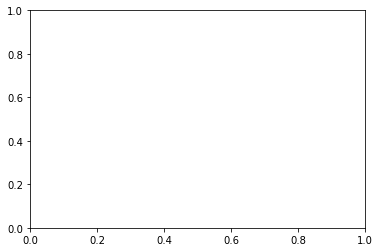

In [36]:
plt.plot(data=DF_Date_Sales)

In [648]:
#pd.to_datetime(X['Date'],infer_datetime_format = True)

TEST1 = pd.to_datetime(pd.Series(X.Date),errors='coerce')

#X.Date = X.Date.dt.week

#print(X.head())

#logreg.fit(X,Y)

In [649]:
TEST2 = TEST1.dt.strftime('%Y')
X.insert(loc = 1,column='Year',value=TEST2)



In [650]:
print(X.head())

   Store  Year Type    Size  Dept        Date  IsHoliday_x  Temperature  \
0      1  2010    A  151315     1  05/02/2010        False        42.31   
1      1  2010    A  151315     1  12/02/2010         True        38.51   
2      1  2010    A  151315     1  19/02/2010        False        39.93   
3      1  2010    A  151315     1  26/02/2010        False        46.63   
4      1  2010    A  151315     1  05/03/2010        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y  
0  211.096358         8.106        False  
1  211.242170         8.106   

In [651]:
X['Date'] = TEST2

In [652]:
X.head()

,Store,Year,Type,Size,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,2010,A,151315,1,2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010,A,151315,1,2010,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010,A,151315,1,2010,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010,A,151315,1,2010,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010,A,151315,1,2010,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [653]:
from sklearn import preprocessing

In [654]:
le_holiday = preprocessing.LabelEncoder()
le_type    = preprocessing.LabelEncoder()

In [655]:
X['IsHoliday_x'] = le_holiday.fit_transform(X['IsHoliday_x'])
X['Type']        = le_type.fit_transform(X['Type'])
X['Temperature'] = le_type.fit_transform(X['Temperature'])

In [656]:
X.head()

,Store,Year,Type,Size,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,2010,0,151315,1,2010,0,800,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010,0,151315,1,2010,1,647,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010,0,151315,1,2010,0,697,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010,0,151315,1,2010,0,1009,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010,0,151315,1,2010,0,1001,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [657]:
le_holiday_y = preprocessing.LabelEncoder()
X['IsHoliday_y'] = le_holiday_y.fit_transform(X['IsHoliday_y'])

In [658]:
X['MarkDown1'] = X['MarkDown1'].fillna(0)
X['MarkDown2'] = X['MarkDown2'].fillna(0)
X['MarkDown3'] = X['MarkDown3'].fillna(0)
X['MarkDown4'] = X['MarkDown4'].fillna(0)
X['MarkDown5'] = X['MarkDown5'].fillna(0)



In [659]:
X['MarkDown1'] = pd.qcut(x=X['MarkDown1'],q=1000,labels=False,duplicates='drop',retbins=0)
X['MarkDown2'] = pd.qcut(x=X['MarkDown2'],q=1000,labels=False,duplicates='drop')
X['MarkDown3'] = pd.qcut(x=X['MarkDown3'],q=1000,labels=False,duplicates='drop')
X['MarkDown4'] = pd.qcut(x=X['MarkDown4'],q=1000,labels=False,duplicates='drop')
X['MarkDown5'] = pd.qcut(x=X['MarkDown5'],q=1000,labels=False,duplicates='drop')
X['Temperature'] = pd.qcut(x=X['Temperature'],q=100,labels=False,duplicates = 'drop')
X['CPI'] = pd.qcut(x=X['CPI'],q=10,labels=False,duplicates = 'drop')
X['Unemployment'] = pd.qcut(x=X['Unemployment'],q=10,labels=False,duplicates = 'drop')
X['Fuel_Price'] = pd.qcut(x=X['Fuel_Price'],q=10,labels=False,duplicates = 'drop')


In [660]:
X

,Store,Year,Type,Size,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,2010,0,151315,1,2010,0,18,0,0,3,0,0,0,7,5,0
1,1,2010,0,151315,1,2010,1,14,0,0,3,0,0,0,7,5,1
2,1,2010,0,151315,1,2010,0,15,0,0,3,0,0,0,7,5,0
3,1,2010,0,151315,1,2010,0,24,0,0,3,0,0,0,7,5,0
4,1,2010,0,151315,1,2010,0,24,0,0,3,0,0,0,7,5,0
5,1,2010,0,151315,1,2010,0,42,0,0,3,0,0,0,7,5,0
6,1,2010,0,151315,1,2010,0,37,0,0,3,0,0,0,7,5,0
7,1,2010,0,151315,1,2010,0,32,1,0,3,0,0,0,7,5,0
8,1,2010,0,151315,1,2010,0,50,0,0,3,0,0,0,7,4,0
9,1,2010,0,151315,1,2010,0,57,1,0,3,0,0,0,6,4,0


In [661]:
from sklearn.model_selection import train_test_split

In [662]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,train_size=0.20,random_state=42)

In [663]:
X_Train.shape

(84314, 17)

In [664]:
from sklearn import linear_model

In [665]:
lreg = linear_model.LinearRegression()

In [666]:
lreg.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [667]:
Y_Predict = lreg.predict(X_Test)


In [1]:
from sklearn.metrics import mean_squared_error,r2_score
# The coefficients
print('Coefficients: \n', lreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_Test, Y_Predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_Test, Y_Predict))



NameError: name 'lreg' is not defined

In [3]:
%%html
<html>
<div id="chartContainer">
  <script src="/lib/d3.v4.3.0.js"></script>
  <script src="http://dimplejs.org/dist/dimple.v2.3.0.min.js"></script>
  <script type="text/javascript">
    var svg = dimple.newSvg("#chartContainer", 590, 400);
    d3.tsv("dataset_merged.csv", function (data) {
      var myChart = new dimple.chart(svg, data);
      myChart.setBounds(80, 30, 480, 330)
      myChart.addMeasureAxis("x", "Weekly_Sales");
      myChart.addCategoryAxis("y", ["Store"]);
      myChart.addSeries("Owner", dimple.plot.bar);
      myChart.addLegend(200, 10, 380, 20, "right");
      myChart.draw();
    });
  </script>
</div>
</html>